# Deep Learning Approach

## Imports

In [1]:
from sklearn.model_selection import train_test_split

from src.utils import load_config
from main import run_preprocessing_pipeline
from src.models import BinaryNeuralNetworkModel, MultilabelNeuralNetworkModel, MulticlassNeuralNetworkModel
from src.evaluation import evaluate_model

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


## Binary Classification

In [2]:
config = load_config("deep-learning/dl-binary")

X, y = run_preprocessing_pipeline(config)
y = y["label"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2025-03-14 00:14:32,380 - src.utils - INFO - Loading config from configs/deep-learning/dl-binary.yaml.
2025-03-14 00:14:32,386 - src.data_loader - INFO - Loading data with {'good_file': 'data/raw/good.csv', 'promo_file': 'data/raw/promotional.csv', 'shuffle': False, 'nrows': 1000, 'save': 'loaded_data_binary.csv'}
2025-03-14 00:14:32,387 - src.data_loader - INFO - Loading non-promotional and promotional data for binary classification.
2025-03-14 00:14:33,054 - src.utils - INFO - Data saved to data/intermediary/loaded_data_binary.csv.
2025-03-14 00:14:33,055 - src.preprocessing - INFO - Preprocessing data with {'remove_non_word': True, 'convert_lowercase': True, 'remove_stopwords': True, 'apply_stemming': True, 'remove_numbers': False, 'remove_whitespace': True, 'save': 'preprocessed_data_binary.csv'}
2025-03-14 00:14:33,056 - src.preprocessing - INFO - Removing non-word characters.
2025-03-14 00:14:34,065 - src.preprocessing - INFO - Converting text to lowercase.
2025-03-14 00:14:34,09

In [3]:
model = BinaryNeuralNetworkModel(X_train.shape[1])

In [4]:
model.fit(X_train, y_train, 0.001, 5, 16)

Epoch 1/5, Loss: 0.2692
Epoch 2/5, Loss: 0.0470
Epoch 3/5, Loss: 0.0111
Epoch 4/5, Loss: 0.0038
Epoch 5/5, Loss: 0.0019


In [5]:
predictions = model.predict(X_test)

2025-03-14 00:15:38,139 - src.evaluation - INFO - Evaluating the model.
2025-03-14 00:15:38,232 - src.evaluation - INFO - Accuracy: 98.50%
2025-03-14 00:15:38,247 - src.evaluation - INFO - Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       199
           1       0.99      0.98      0.98       201

    accuracy                           0.98       400
   macro avg       0.99      0.99      0.98       400
weighted avg       0.99      0.98      0.98       400

2025-03-14 00:15:38,250 - src.evaluation - INFO - Confusion Matrix:
[[197   2]
 [  4 197]]
2025-03-14 00:15:38,390 - src.evaluation - INFO - Evaluation finished.


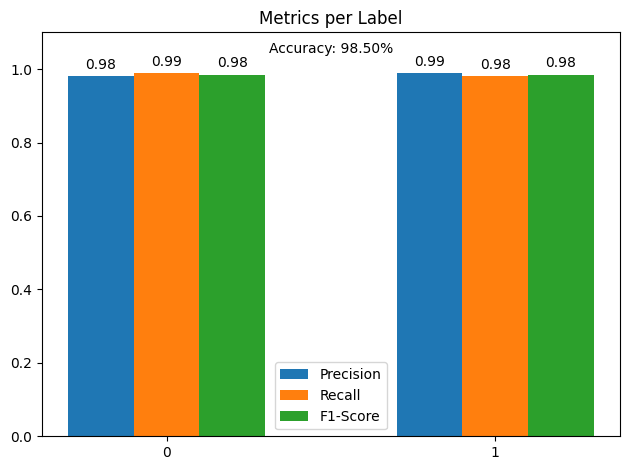

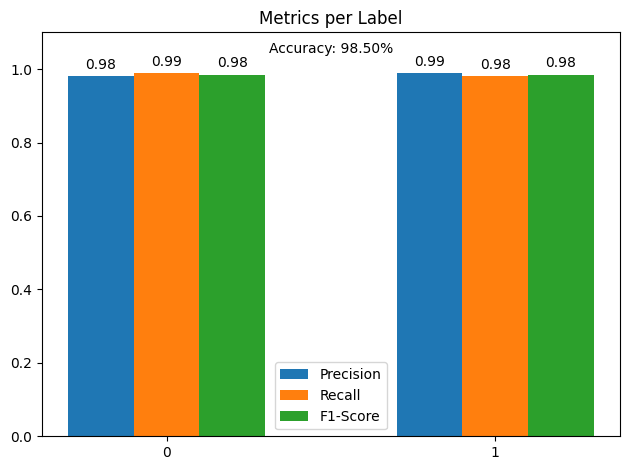

In [6]:
evaluate_model(model, X_test, y_test)

## Multilabel Classification

In [7]:
config = load_config("deep-learning/dl-multilabel")

X, y = run_preprocessing_pipeline(config)
columns = ["advert", "coi", "fanpov", "pr", "resume"]
y = y[columns].values.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2025-03-14 00:15:38,883 - src.utils - INFO - Loading config from configs/deep-learning/dl-multilabel.yaml.
2025-03-14 00:15:38,888 - src.data_loader - INFO - Loading data with {'good_file': 'data/raw/good.csv', 'promo_file': 'data/raw/promotional.csv', 'shuffle': False, 'nrows': 1000, 'save': 'loaded_data_binary.csv'}
2025-03-14 00:15:38,889 - src.data_loader - INFO - Loading promotional data for multilabel classification.
2025-03-14 00:15:39,055 - src.utils - INFO - Data saved to data/intermediary/loaded_data_binary.csv.
2025-03-14 00:15:39,056 - src.preprocessing - INFO - Preprocessing data with {'remove_non_word': True, 'convert_lowercase': True, 'remove_stopwords': True, 'apply_stemming': True, 'remove_numbers': False, 'remove_whitespace': True, 'save': 'preprocessed_data_binary.csv'}
2025-03-14 00:15:39,057 - src.preprocessing - INFO - Removing non-word characters.
2025-03-14 00:15:39,301 - src.preprocessing - INFO - Converting text to lowercase.
2025-03-14 00:15:39,306 - src.prep

In [8]:
model = MultilabelNeuralNetworkModel(X_train.shape[1])

In [9]:
model.fit(X_train, y_train, learning_rate=0.001, num_epochs=5, batch_size=16)

Epoch 1/5, Loss: 0.4426
Epoch 2/5, Loss: 0.2849
Epoch 3/5, Loss: 0.2477
Epoch 4/5, Loss: 0.2007
Epoch 5/5, Loss: 0.1555


In [10]:
predictions = model.predict(X_test)

2025-03-14 00:16:01,655 - src.evaluation - INFO - Evaluating the model.
2025-03-14 00:16:01,705 - src.evaluation - INFO - Accuracy: 70.00%
2025-03-14 00:16:01,719 - src.evaluation - INFO - Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       158
           1       0.00      0.00      0.00        18
           2       1.00      0.08      0.15        12
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00        10

   micro avg       0.82      0.70      0.76       220
   macro avg       0.36      0.21      0.21       220
weighted avg       0.65      0.70      0.65       220
 samples avg       0.78      0.74      0.75       220

2025-03-14 00:16:01,724 - src.evaluation - INFO - Confusion Matrix:
[[[  9  33]
  [  4 154]]

 [[182   0]
  [ 18   0]]

 [[188   0]
  [ 11   1]]

 [[178   0]
  [ 22   0]]

 [[190   0]
  [ 10   0]]]
2025-03-14 00:16:01,848 - src.evaluation - INFO

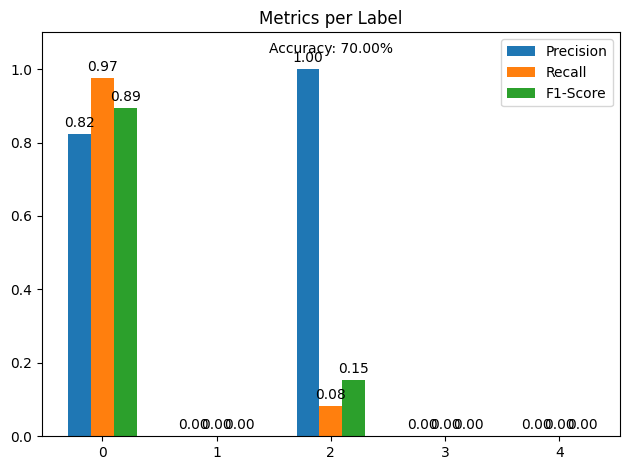

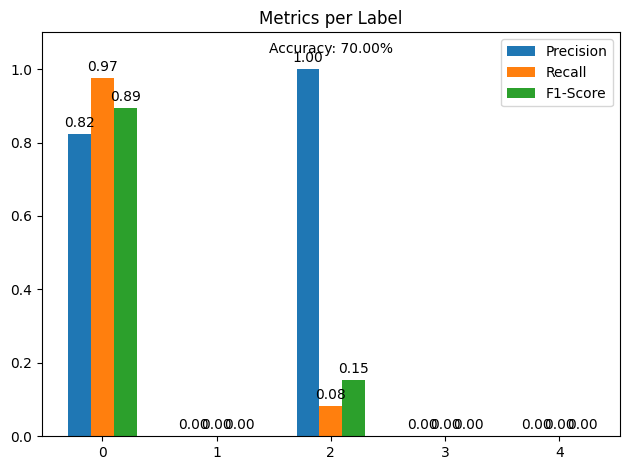

In [11]:
evaluate_model(model, X_test, y_test)

## Augmented Classification

In [12]:
config = load_config("deep-learning/dl-augmented")

X, y = run_preprocessing_pipeline(config)

columns = ["advert", "coi", "fanpov", "pr", "resume"]
y = y[columns].values.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2025-03-14 00:16:02,361 - src.utils - INFO - Loading config from configs/deep-learning/dl-augmented.yaml.
2025-03-14 00:16:02,367 - src.data_loader - INFO - Loading data with {'promo_file': 'data/raw/augmented_promotional.csv', 'shuffle': False, 'nrows': 1000, 'save': 'loaded_data_augmented.csv'}
2025-03-14 00:16:02,368 - src.data_loader - INFO - Loading promotional data for multilabel classification.
2025-03-14 00:16:02,538 - src.utils - INFO - Data saved to data/intermediary/loaded_data_augmented.csv.
2025-03-14 00:16:02,539 - src.preprocessing - INFO - Preprocessing data with {'remove_non_word': True, 'convert_lowercase': True, 'remove_stopwords': True, 'apply_stemming': True, 'remove_numbers': False, 'remove_whitespace': True, 'save': 'preprocessed_data_augmented.csv'}
2025-03-14 00:16:02,540 - src.preprocessing - INFO - Removing non-word characters.
2025-03-14 00:16:02,956 - src.preprocessing - INFO - Converting text to lowercase.
2025-03-14 00:16:02,963 - src.preprocessing - INFO

In [13]:
model = MultilabelNeuralNetworkModel(X_train.shape[1])

In [14]:
model.fit(X_train, y_train, learning_rate=0.001, num_epochs=5, batch_size=16)

Epoch 1/5, Loss: 0.4497
Epoch 2/5, Loss: 0.2865
Epoch 3/5, Loss: 0.2507
Epoch 4/5, Loss: 0.2142
Epoch 5/5, Loss: 0.1735


In [15]:
predictions = model.predict(X_test)

2025-03-14 00:16:26,310 - src.evaluation - INFO - Evaluating the model.
2025-03-14 00:16:26,368 - src.evaluation - INFO - Accuracy: 70.00%
2025-03-14 00:16:26,383 - src.evaluation - INFO - Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89       158
           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00        10

   micro avg       0.81      0.70      0.75       220
   macro avg       0.16      0.20      0.18       220
weighted avg       0.58      0.70      0.64       220
 samples avg       0.78      0.74      0.75       220

2025-03-14 00:16:26,389 - src.evaluation - INFO - Confusion Matrix:
[[[  6  36]
  [  3 155]]

 [[182   0]
  [ 18   0]]

 [[188   0]
  [ 12   0]]

 [[178   0]
  [ 22   0]]

 [[190   0]
  [ 10   0]]]
2025-03-14 00:16:26,523 - src.evaluation - INFO

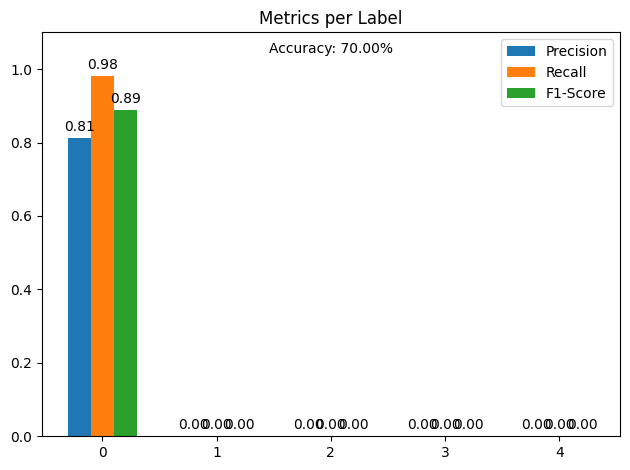

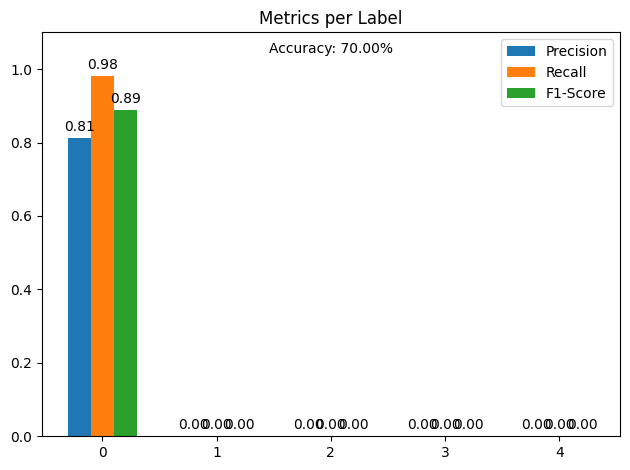

In [16]:
evaluate_model(model, X_test, y_test)

## Wikipedia-Dump

In [17]:
config = load_config("deep-learning/dl-wp-binary")

X, y = run_preprocessing_pipeline(config)

y = y["label"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2025-03-14 00:16:27,227 - src.utils - INFO - Loading config from configs/deep-learning/dl-wp-binary.yaml.
2025-03-14 00:16:27,238 - src.data_loader - INFO - Loading data with {'good_file': 'data/wp/good_sample.csv', 'promo_file': 'data/wp/promotional_sample.csv', 'neutral_file': 'data/wp/neutral_sample.csv', 'shuffle': False, 'nrows': 100, 'save': 'loaded_data_wp_binary.csv'}
2025-03-14 00:16:27,239 - src.data_loader - INFO - Loading non-promotional and promotional data for binary classification.
2025-03-14 00:16:27,768 - src.utils - INFO - Data saved to data/intermediary/loaded_data_wp_binary.csv.
2025-03-14 00:16:27,769 - src.preprocessing - INFO - Preprocessing data with {'remove_non_word': True, 'convert_lowercase': True, 'remove_stopwords': True, 'apply_stemming': True, 'remove_numbers': False, 'remove_whitespace': True, 'save': 'preprocessed_data_wp_binary.csv'}
2025-03-14 00:16:27,769 - src.preprocessing - INFO - Removing non-word characters.
2025-03-14 00:16:28,678 - src.prepro

In [18]:
model = MulticlassNeuralNetworkModel(X_train.shape[1])

In [19]:
model.fit(X_train, y_train, 0.001, 5, 16)

Epoch 1/5, Loss: 1.0438
Epoch 2/5, Loss: 0.8134
Epoch 3/5, Loss: 0.5333
Epoch 4/5, Loss: 0.3057
Epoch 5/5, Loss: 0.1614


In [20]:
predictions = model.predict(X_test)

2025-03-14 00:17:08,501 - src.evaluation - INFO - Evaluating the model.
2025-03-14 00:17:08,521 - src.evaluation - INFO - Accuracy: 86.67%
2025-03-14 00:17:08,537 - src.evaluation - INFO - Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        22
           1       0.72      0.81      0.76        16
           2       1.00      0.82      0.90        22

    accuracy                           0.87        60
   macro avg       0.87      0.86      0.86        60
weighted avg       0.88      0.87      0.87        60

2025-03-14 00:17:08,541 - src.evaluation - INFO - Confusion Matrix:
[[21  1  0]
 [ 3 13  0]
 [ 0  4 18]]
2025-03-14 00:17:08,681 - src.evaluation - INFO - Evaluation finished.


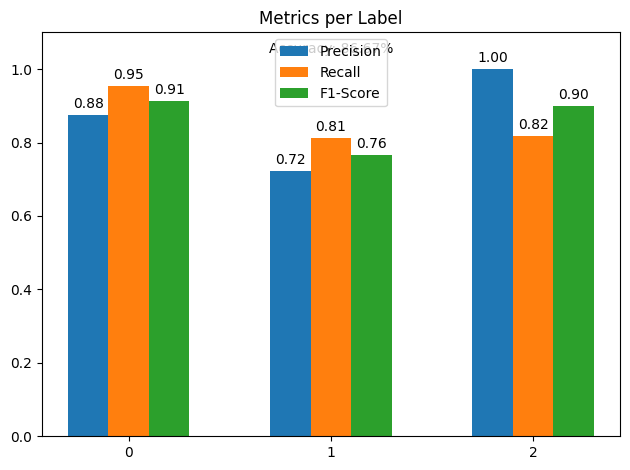

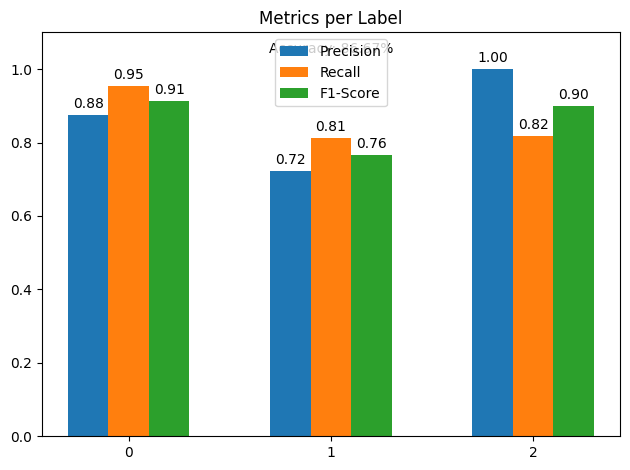

In [21]:
evaluate_model(model, X_test, y_test)